In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.linear_model import SGDRegressor

In [3]:
# ---------------------------
# Step 1: 弹出文件选择框读取CSV数据
# ---------------------------
# 隐藏Tkinter主窗口
root = Tk()
root.withdraw()

# 弹出文件选择对话框（选择CSV文件）
filename = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
if not filename:
    raise ValueError("No file selected!")

# 读取CSV文件，自动识别表头（如果CSV文件无表头，请修改为 header=None）
data = pd.read_csv(filename)
# 提取数据：假定第一列为自变量 x，第二列为因变量 y
X = data.iloc[:, 0].values.reshape(-1, 1)  # 保证 X 为二维数组
y = data.iloc[:, 1].values

In [5]:
# ---------------------------
# Step 2: 利用梯度下降实现线性回归（使用SGDRegressor）
# ---------------------------
model = SGDRegressor(loss='squared_error',
                     penalty=None,
                     learning_rate='constant',
                     eta0=0.01,
                     max_iter=1,
                     warm_start=True,
                     random_state=42)

num_iterations = 1000         # 训练的总迭代次数
cost_history = []             # 用于记录每次迭代的代价

# 利用 partial_fit 进行迭代训练
for i in range(num_iterations):
    model.partial_fit(X, y)
    predictions = model.predict(X)
    # 计算均方误差的代价函数 J = (1/2m) * Σ(h(x)-y)^2
    cost = np.mean((predictions - y) ** 2) / 2
    cost_history.append(cost)
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost}")

Iteration 0, Cost: 2.46125534951603
Iteration 100, Cost: 2.330999096360104
Iteration 200, Cost: 2.327895853817223
Iteration 300, Cost: 2.3278179470729063
Iteration 400, Cost: 2.327815988439485
Iteration 500, Cost: 2.3278159391962174
Iteration 600, Cost: 2.3278159379581607
Iteration 700, Cost: 2.3278159379270336
Iteration 800, Cost: 2.327815937926255
Iteration 900, Cost: 2.3278159379262244


In [7]:
# ---------------------------
# Step 3: 打印最终拟合方程
# ---------------------------
# 拟合的线性模型为 y = coef * x + intercept
slope = model.coef_[0]
intercept = model.intercept_[0]
print(f"Final fitted equation: y = {slope:.4f} * x + {intercept:.4f}")

Final fitted equation: y = 2.2350 * x + 0.0489


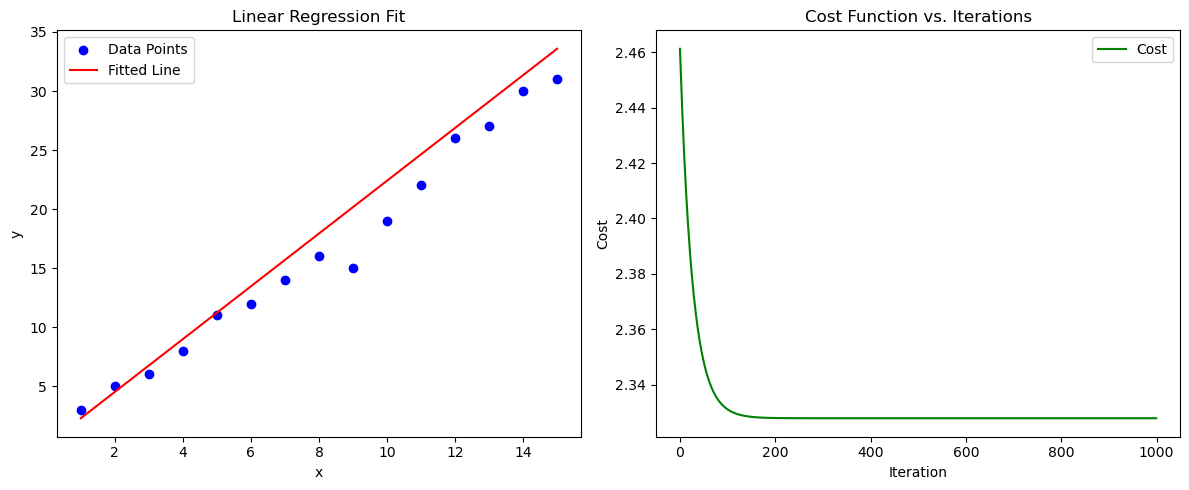

In [9]:
# ---------------------------
# Step 4: 绘制图像
# ---------------------------
plt.figure(figsize=(12, 5))

# 子图1：数据散点图与拟合直线
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', label='Fitted Line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()

# 子图2：代价函数随迭代次数的变化曲线
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), cost_history, color='green', label='Cost')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations")
plt.legend()

plt.tight_layout()
plt.show()